In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('RL_lib/Agents/PPO')
sys.path.append('RL_lib/Utils')

In [4]:
import numpy as np

import env_lib

from policy_ppo import Policy
from value_function import Value_function
from utils import Mapminmax,Logger,Scaler
import utils

6dof dynamics model
Quaternion_attitude
Thruster Config Shape:  (4, 6) 4
queue fixed
Flat Constraint
Inertia Tensor:  [[2000.    0.    0.]
 [   0. 2000.    0.]
 [   0.    0. 3200.]]
Lander Model: 
 - apf_v0:  70
 - apf_vf1:  [ 0.  0. -2.]
 - apf_vf2:  [ 0.  0. -1.]
 - apf_atarg:  15.0
 - apf_tau1:  20
 - apf_tau2:  100.0
Attitude Constraint
Reward_terminal
lander env att 2 fixed


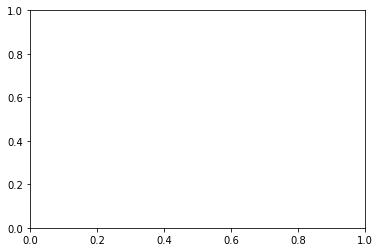

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

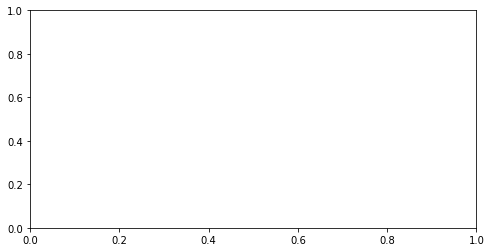

In [5]:
from env_gaudet_lander import LanderEnvironment

env = LanderEnvironment()

In [6]:
obs_dim = 12
act_dim = 4

policy = Policy(obs_dim,act_dim,kl_targ=0.001,epochs=20, beta=0.1, shuffle=True, servo_kl=True, discretize=True)

fname = "optimize_4km"
input_normalizer = utils.load_run(policy,fname)
print(input_normalizer)

PPO Policy 1

Instructions for updating:
Use keras.layers.dense instead.

Policy Params -- h1: 120, h2: 69, h3: 40, lr: 0.000108, logvar_speed: 8


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Actions
[[0.]
 [1.]]
10
Actor Test Mode:  False
clip param:  0.1
dict_keys(['h1/bias:0', 'h1/kernel:0', 'h2/bias:0', 'h2/kernel:0', 'means/bias:0', 'h3/bias:0', 'means/kernel:0', 'logvars:0', 'h3/kernel:0'])


In [27]:
import pdb
from env_gaudet_lander import int_to_bin, bin_to_int

def ppo_policy(s):
    s_norm = input_normalizer.apply(s)
    a = policy.sample(s_norm)
    return bin_to_int(list(a[1][0]))

def policy_demo(H, env, N_ep, show=False):
    R_ep = []
    for ep_no in range(N_ep):
        s = env.reset()
        done = False
        Rt = []
        while not done:
            a = H(s)
            s, r, done, _ = env.step(a)
            if show:
                env.render()
            Rt.append(np.sum(r))
        R_ep.append(Rt)
    return R_ep

In [30]:
policy.test_mode=True
R = policy_demo(ppo_policy,env,1)

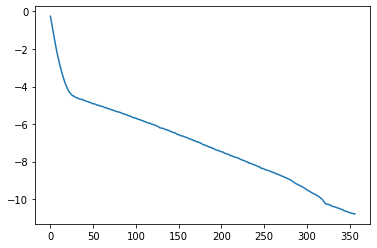

In [31]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(R[0]))